<a href="https://colab.research.google.com/github/Shashank14081987/Assignment-Linear-and-Logistic-regression/blob/main/Country_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("Country-data.csv")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
sns.pairplot(df);
plt.suptitle('Pairplot', y=10.1)

Text(0.5, 10.1, 'Pairplot')

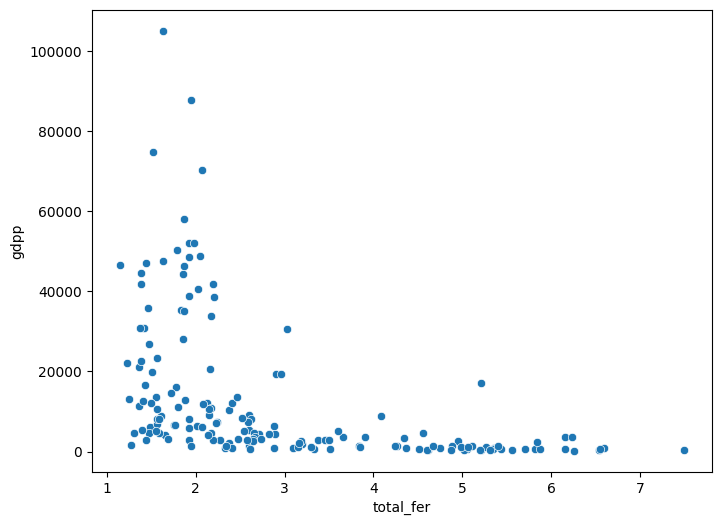

In [6]:
plt.figure(figsize=(8,6), dpi=100)
sns.scatterplot(data=df, x='total_fer',y= 'gdpp', palette='viridis');

**Creating Model**

In [7]:
from sklearn.cluster import KMeans

In [8]:
!pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming 'df' is your DataFrame
# Select the columns you want to scale
# Replace 'columns_to_scale' with the actual column names
columns_to_scale = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
features = df[columns_to_scale]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data and transform it
scaled_df = scaler.fit_transform(features) # creates scaled_df by scaling the selected features

# Now you can use scaled_df in your KMeans model
ssd = []
for k in range(2, 11):
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)  # Use the scaled data here
    ssd.append(model.inertia_)

Text(0, 0.5, 'Sum of squared Distances')

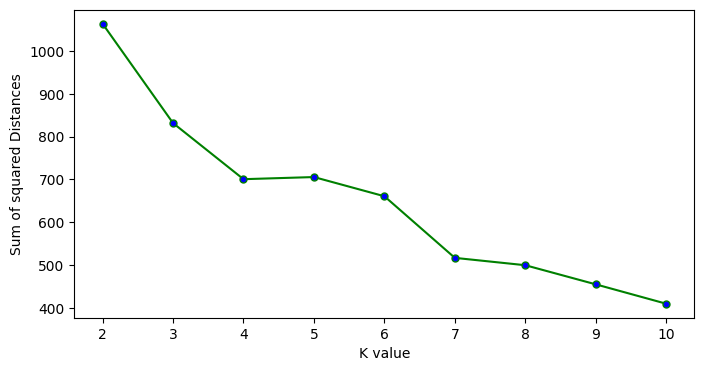

In [9]:
plt.figure(figsize=(8,4), dpi=100)
plt.plot(range(2,11), ssd, marker='o', color='green', markerfacecolor='blue', markersize=5) # Changed 'colour' to 'color'
plt.xlabel("K value")  # Changed 'xlable' to 'xlabel'
plt.ylabel("Sum of squared Distances")

In [10]:
model=KMeans(n_clusters=5)
model.fit(scaled_df)

KMeans(n_clusters=5)

In [11]:
k_means_labels = model.fit_predict(scaled_df) # Change df to scaled_df
k_means_labels

array([4, 1, 2, 2, 1, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 3, 1, 4, 1, 2, 1, 1,
       1, 3, 1, 4, 4, 1, 4, 3, 1, 4, 4, 1, 1, 1, 4, 4, 2, 1, 4, 1, 3, 1,
       3, 1, 1, 2, 1, 2, 2, 1, 1, 3, 3, 2, 4, 1, 3, 2, 3, 1, 1, 4, 4, 1,
       4, 1, 3, 2, 2, 1, 2, 3, 3, 3, 1, 3, 1, 2, 4, 4, 3, 1, 2, 1, 1, 4,
       4, 1, 1, 0, 1, 2, 4, 1, 1, 4, 0, 2, 1, 1, 1, 2, 1, 1, 4, 2, 4, 2,
       3, 3, 4, 2, 3, 1, 2, 1, 1, 1, 1, 1, 3, 3, 1, 1, 4, 1, 1, 4, 1, 1,
       4, 0, 1, 3, 1, 4, 1, 3, 2, 1, 2, 1, 3, 3, 2, 4, 1, 2, 4, 1, 1, 1,
       1, 4, 1, 3, 3, 3, 1, 2, 1, 2, 1, 2, 4], dtype=int32)

In [12]:
from sklearn.metrics import silhouette_score
sil_score=silhouette_score(scaled_df, k_means_labels)
sil_score

0.2555041771616078

In [13]:
import plotly.express as px
fig=px.scatter_3d(df, x='gdpp', y='income', z='total_fer', color=k_means_labels)
fig.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [15]:
model=AgglomerativeClustering(n_clusters=None, distance_threshold=0)
model.fit(scaled_df)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [16]:
cluster_labels= model.fit_predict(scaled_df)
cluster_labels

array([118, 160, 100, 141, 140, 155, 156, 130, 150,  92, 104,  95, 146,
       148, 106, 136, 126, 135, 108, 129, 157, 109,  89, 147, 164, 113,
       123, 144, 124, 158, 145,  85, 131, 101, 139, 137, 110,  97, 117,
        86, 127, 166, 134, 154, 112, 142, 120, 111,  83, 163,  93, 153,
        87, 159, 133, 105,  77, 119, 149, 102, 162, 128, 161,  91,  59,
        70,  63, 151, 122,  79, 107, 132,  66,  64,  69, 165, 143,  88,
        72, 138, 125,  90,  78, 115,  99,  44,  94,  73,  55, 114,  43,
        71,  68,  38,  74,  96,  58,  84, 103,  54,  80,  62,  51,  45,
        52,  56,  67, 121,  35, 116, 152,  81,  98,  47,  31,  61,  39,
        65,  75,  48,  27,  30,  53,  60,  57,  36,  46,  29,  76,  82,
        40,  37,  34,  49,  50,  42,  24,  32,  23,  26,  25,  19,  11,
        15,  21,  41,  18,  22,  12,  10,  28,  33,  14,  17,  16,  13,
         7,   5,   8,  20,   3,   9,   6,   4,   1,   2,   0])

In [17]:
linkage_matrix= hierarchy.linkage(scaled_df, method='ward')
linkage_matrix[:][:5]

array([[ 41.        , 121.        ,   0.27051092,   2.        ],
       [ 75.        , 139.        ,   0.34593963,   2.        ],
       [ 24.        ,  85.        ,   0.42313147,   2.        ],
       [111.        , 158.        ,   0.49433038,   2.        ],
       [ 60.        , 122.        ,   0.54410516,   2.        ]])

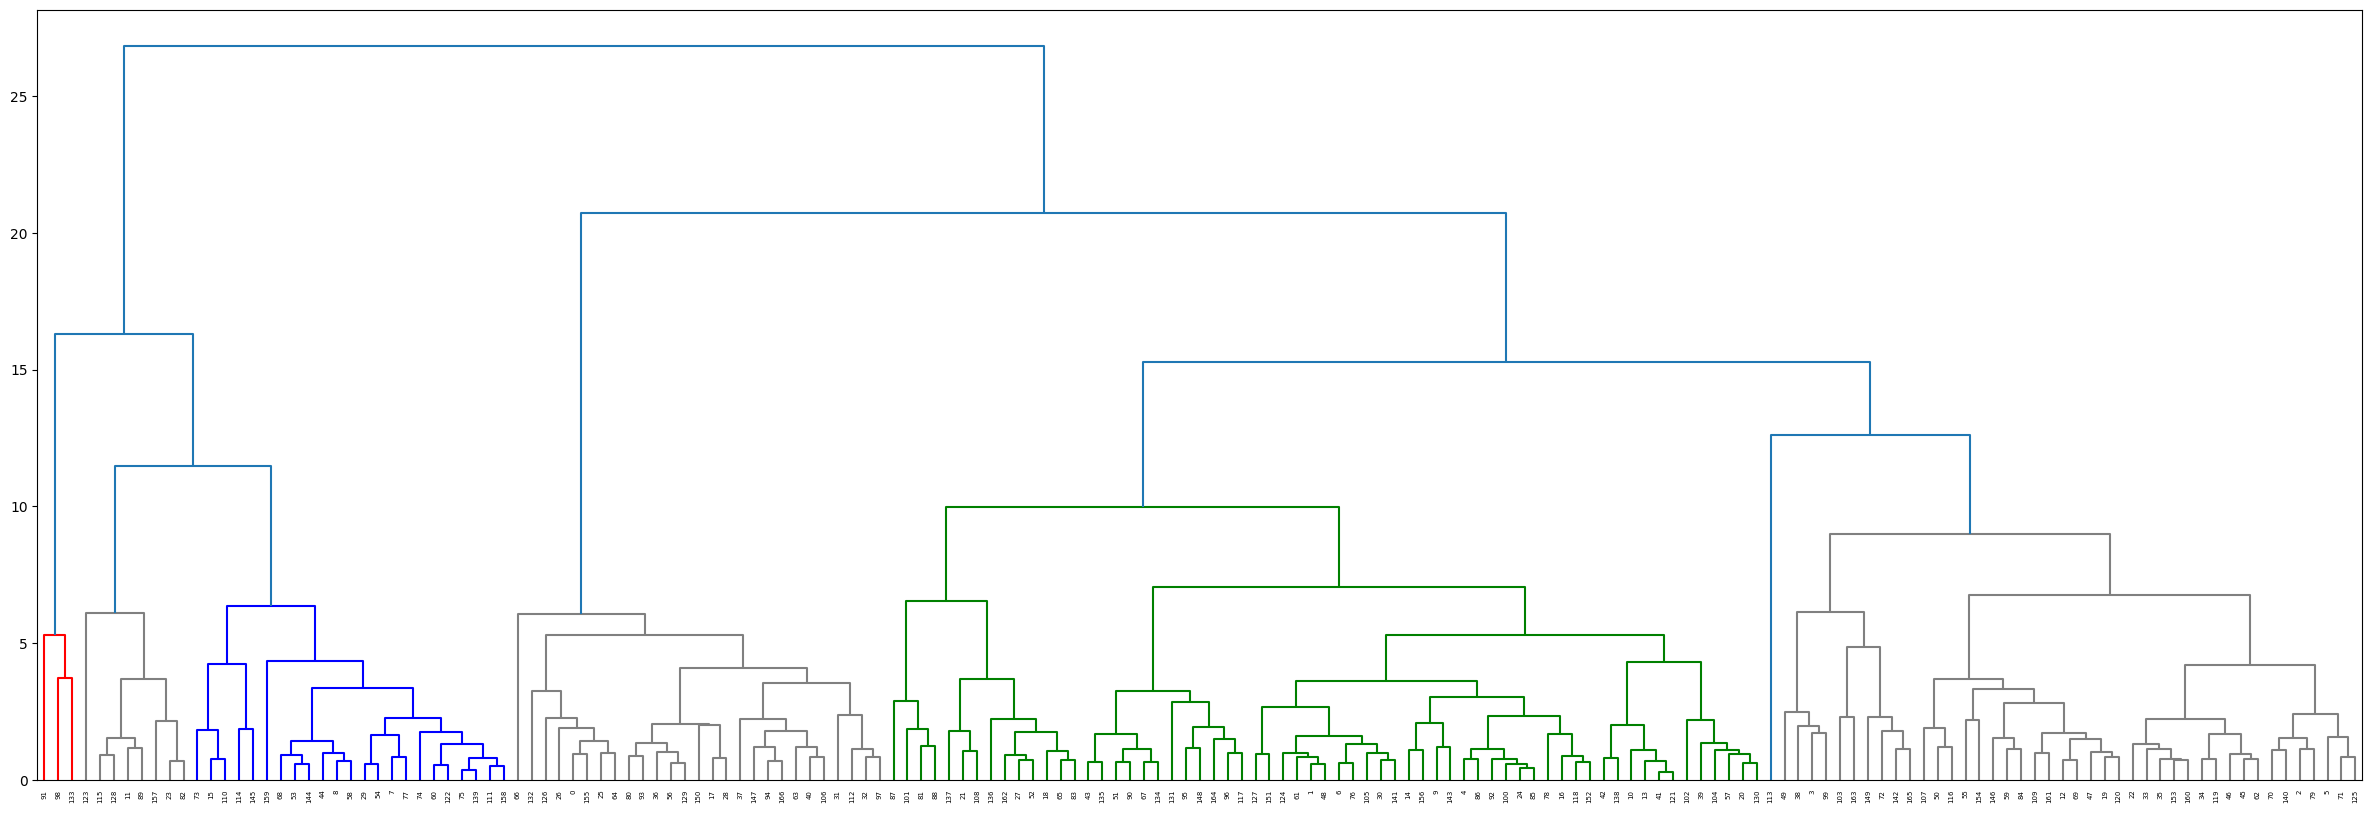

In [18]:
plt.figure(figsize=(30,10))
hierarchy.set_link_color_palette(['r','grey', 'b', 'grey', 'g','grey', 'orange'])
# Changed 'truncate_model' to 'truncate_mode' and corrected the value format
dn=hierarchy.dendrogram(linkage_matrix, truncate_mode='level', p=15, color_threshold=10)

In [19]:
!pip install scikit-learn # Install scikit-learn if not already installed
from sklearn.cluster import DBSCAN # Import the DBSCAN class

outlier_percent=[]
for eps in np.linspace(0.001,3,50): # Changed 'linespace' to 'linspace'

  dbscan=DBSCAN(eps=eps, min_samples=10)
  dbscan.fit(scaled_df)

  perc_outliers=100*np.sum(dbscan.labels_==-1)/len(dbscan.labels_)
  outlier_percent.append(perc_outliers)

Text(0, 0.5, 'Outlier Percentage')

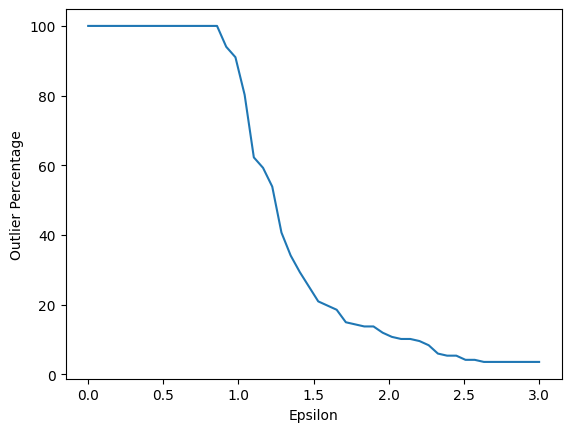

In [20]:
sns.lineplot(x=np.linspace(0.001,3,50), y= outlier_percent)
plt.xlabel("Epsilon")
plt.ylabel("Outlier Percentage")

In [21]:
dbscan= DBSCAN(eps=2.2, min_samples=10)
dbscan.fit(scaled_df)

DBSCAN(eps=2.2, min_samples=10)

In [22]:
DBSCAN(eps=2.2, min_samples=10)

DBSCAN(eps=2.2, min_samples=10)

In [23]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0])

In [24]:
import plotly.express as px
fig=px.scatter_3d(df, x='gdpp', y='income', z='total_fer', color=dbscan.labels_)
fig.show()

In [25]:
dbscan=DBSCAN(eps=2.2, min_samples=10)
dbscan.fit(scaled_df)

DBSCAN(eps=2.2, min_samples=10)

In [26]:
outlier_percent=[]
for eps in np.linspace(0.001,20,50):
  dbscan=DBSCAN(eps=eps,min_samples=10)
  dbscan.fit(scaled_df) # Change df to scaled_df to use the scaled data

  perc_ouliers=100*np.sum(dbscan.labels_==-1)/len(dbscan.labels_)
  outlier_percent.append(perc_ouliers)

Text(0, 0.5, 'Outlier Percentage')

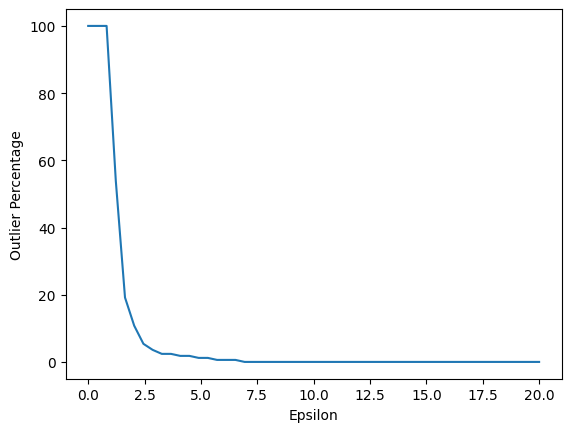

In [27]:
sns.lineplot(x=np.linspace(0.001,20,50), y=outlier_percent)
plt.xlabel("Epsilon")
plt.ylabel("Outlier Percentage")
#

In [28]:
dbscan=DBSCAN(eps=2.35,min_samples=10)
dbscan.fit(scaled_df)

DBSCAN(eps=2.35, min_samples=10)

In [29]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0])

In [30]:
df['labels'] = k_means_labels

In [31]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,4
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,3
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,3
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1


In [32]:
import plotly.express as px
fig=px.scatter_3d(df, x='gdpp', y='income', z='total_fer', color='labels')
fig.show()